<h2>
    Ebay Car Sales - Data Cleaning
</h2>

<h3>
    Description: 
</h3>
<p>
Data Cleaning of a dataset of used cars from eBay Kleinanzeigen, a classified section of German eBay website. The dataset was originally scraped and uploaded to Kaggle. The aim of this project is to clean the data and analyze the included used car listing.
</p>

<h3>Format: </h3><p> A data frame with 20 variables:</p>

<ul>
    <li>dateCrawled - When this ad was first crawled. All field-values are taken from this date</li>
    <li>name - Name of the car</li>
    <li>seller - Whether the seller is private or a dealer</li>
    <li>offerType - The type of listing</li>
    <li>abtest - Whether the listing is included in an A/B test</li>
    <li>vehicleType - The vehicle Type</li>
    <li>yearOfRegistration - The year in wich the car was first registered</li>
    <li>gearbox - The transmission type</li>
    <li>model -The car model name</li>
    <li>kilometer - How many kilometers the car has driven</li>
    <li>monthOfRegistration - The month in which the car was first registered</li>
    <li>fuelType - The brand of the car</li>
    <li>notRepairedDamage - If the car has a damage which is not yet repaired</li>
    <li>dateCreated - The date on which the eBay listing was created</li>
    <li>nrOfPictures - The number of pictures in the ad</li>
    <li>postalCode - The postal code for the location of the vehicle</li>
    <li>lastSeenOnline - When the crawler saw this ad last online</li>
</ul>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:/Users/Максим/Desktop/Statistics/autos.csv', encoding= 'Latin-1')
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


<h3>
    Renaming dataset columns 
</h3>

In [3]:
df.rename(columns={'dateCrawled':'date_crawled',
                   'price':'price_dol',
                  'offerType':'offer_type',
                  'vehicleType':'vehicle_type',
                  'yearOfRegistration':'year_of_registration',
                  'powerPS':'power_ps',
                   'monthOfRegistration':'month_of_registration',
                   'fuelType':'fuel_type',
                   'notRepairedDamage':'not_repaired_damage',
                   'dateCreated':'date_created',
                   'nrOfPictures':'nr_of_pictures',
                   'postalCode':'postal_code',
                   'lastSeen':'last_seen',
                   'odometer':'odometer_km'
},inplace = True)
df.head(1)

,date_crawled,name,seller,offer_type,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


In [4]:
df.dtypes

date_crawled             object
name                     object
seller                   object
offer_type               object
price_dol                object
abtest                   object
vehicle_type             object
year_of_registration      int64
gearbox                  object
power_ps                  int64
model                    object
odometer_km              object
month_of_registration     int64
fuel_type                object
brand                    object
not_repaired_damage      object
date_created             object
nr_of_pictures            int64
postal_code               int64
last_seen                object
dtype: object

<h3>
    Converting this columns to date type and format like day-month-year
</h3>

In [5]:
dates = ['date_crawled', 'date_created', 'last_seen']

for i in dates:
    df[i] = pd.to_datetime(pd.to_datetime(df[i]).dt.strftime('%d-%m-%Y'))

df.head()

,date_crawled,name,seller,offer_type,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26,0,79588,2016-06-04
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04,0,71034,2016-06-04
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-06-04
3,2016-12-03,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-12-03,0,33729,2016-03-15
4,2016-01-04,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-01-04,0,39218,2016-01-04


In [6]:
df[['date_crawled', 'date_created', 'last_seen']].dtypes

date_crawled    datetime64[ns]
date_created    datetime64[ns]
last_seen       datetime64[ns]
dtype: object

In [7]:
df[['date_crawled','date_created', 'last_seen']].describe(datetime_is_numeric=True)

,date_crawled,date_created,last_seen
count,50000,50000,50000
mean,2016-04-26 09:00:03.456000,2016-04-26 03:24:47.808000,2016-05-08 01:59:00.096000
min,2016-01-04 00:00:00,2015-05-12 00:00:00,2016-01-04 00:00:00
25%,2016-03-17 00:00:00,2016-03-17 00:00:00,2016-03-23 00:00:00
50%,2016-03-25 00:00:00,2016-03-25 00:00:00,2016-05-04 00:00:00
75%,2016-05-03 00:00:00,2016-05-03 00:00:00,2016-06-04 00:00:00
max,2016-12-03 00:00:00,2016-12-03 00:00:00,2016-12-03 00:00:00


<h3>
    Unique values of dataset columns
</h3>

In [8]:
for i in df[['seller','offer_type','price_dol','abtest','vehicle_type','year_of_registration','gearbox','odometer_km',
   'month_of_registration','fuel_type','brand','not_repaired_damage','nr_of_pictures']]:
    print("-"*5, i, "-"*5, "\n", df[i].unique(),"\n")


----- seller ----- 
 ['privat' 'gewerblich'] 

----- offer_type ----- 
 ['Angebot' 'Gesuch'] 

----- price_dol ----- 
 ['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995'] 

----- abtest ----- 
 ['control' 'test'] 

----- vehicle_type ----- 
 ['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere'] 

----- year_of_registration ----- 
 [2004 1997 2009 2007 2003 2006 1995 1998 2000 2017 2010 1999 1982 1990
 2015 2014 1996 1992 2005 2002 2012 2011 2008 1985 2016 1994 1986 2001
 2018 2013 1972 1993 1988 1989 1967 1973 1956 1976 4500 1987 1991 1983
 1960 1969 1950 1978 1980 1984 1963 1977 1961 1968 1934 1965 1971 1966
 1979 1981 1970 1974 1910 1975 5000 4100 2019 1959 9996 9999 6200 1964
 1958 1800 1948 1931 1943 9000 1941 1962 1927 1937 1929 1000 1957 1952
 1111 1955 1939 8888 1954 1938 2800 5911 1500 1953 1951 4800 1001] 

----- gearbox ----- 
 ['manuell' 'automatik' nan] 

----- odometer_km ----- 
 ['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,0

<h3>
    Replacing characters in columns and converting their data type
</h3>

In [9]:
df['price_dol'] = df['price_dol'].replace({'[,]':'','[$]':''}, regex=True).astype(int)
df['odometer_km'] = df['odometer_km'].replace({'[,]':'','[km]':''}, regex=True).astype(int)

df.head()

,date_crawled,name,seller,offer_type,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-06-04
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,0,71034,2016-06-04
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-06-04
3,2016-12-03,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-12-03,0,33729,2016-03-15
4,2016-01-04,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-01-04,0,39218,2016-01-04


In [10]:
for i in df[['price_dol', 'odometer_km']]:
    print("-"*5, i, "-"*5, "\n", df[i].unique(),"\n")


----- price_dol ----- 
 [ 5000  8500  8990 ...   385 22200 16995] 

----- odometer_km ----- 
 [150000  70000  50000  80000  10000  30000 125000  90000  20000  60000
   5000 100000  40000] 



In [11]:
df.isnull().sum()

date_crawled                0
name                        0
seller                      0
offer_type                  0
price_dol                   0
abtest                      0
vehicle_type             5095
year_of_registration        0
gearbox                  2680
power_ps                    0
model                    2758
odometer_km                 0
month_of_registration       0
fuel_type                4482
brand                       0
not_repaired_damage      9829
date_created                0
nr_of_pictures              0
postal_code                 0
last_seen                   0
dtype: int64

<h3>
    Removing columns that do not contain important data
</h3>

In [12]:
df['nr_of_pictures'].value_counts(dropna=False)

0    50000
Name: nr_of_pictures, dtype: int64

In [13]:
df['seller'].value_counts(dropna=False)

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [14]:
df['offer_type'].value_counts(dropna=False)

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [15]:
df[df['offer_type']=='Gesuch']

,date_crawled,name,seller,offer_type,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
17541,2016-03-04,Suche_VW_T5_Multivan,privat,Gesuch,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,0,29690,2016-05-04


In [16]:
df[df['seller']=='gewerblich']

,date_crawled,name,seller,offer_type,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
7738,2016-03-15,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,gewerblich,Angebot,100,control,kombi,2000,manuell,0,megane,150000,8,benzin,renault,NaN,2016-03-15,0,65232,2016-06-04


In [17]:
df = df.drop(["nr_of_pictures", "seller", "offer_type"], axis=1)

<h3>
    Replacing extra characters and removing spaces in the column with car names
</h3>

In [18]:
df['name'] = df['name'].replace({'[_]':' ', ' +':' '}, regex=True)
df['name'] = df['name'].str.strip() 
df.head(5)

,date_crawled,name,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
0,2016-03-26,Peugeot 807 160 NAVTECH ON BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-06-04
1,2016-04-04,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-06-04
2,2016-03-26,Volkswagen Golf 1.6 United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-06-04
3,2016-12-03,Smart smart fortwo coupe softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-12-03,33729,2016-03-15
4,2016-01-04,Ford Focus 1 6 Benzin TÜV neu ist sehr gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-01-04,39218,2016-01-04


<h3>
    Deleting records with registration year greater than 2019 and less than 1910
</h3>

In [19]:
df['year_of_registration'].unique()

array([2004, 1997, 2009, 2007, 2003, 2006, 1995, 1998, 2000, 2017, 2010,
       1999, 1982, 1990, 2015, 2014, 1996, 1992, 2005, 2002, 2012, 2011,
       2008, 1985, 2016, 1994, 1986, 2001, 2018, 2013, 1972, 1993, 1988,
       1989, 1967, 1973, 1956, 1976, 4500, 1987, 1991, 1983, 1960, 1969,
       1950, 1978, 1980, 1984, 1963, 1977, 1961, 1968, 1934, 1965, 1971,
       1966, 1979, 1981, 1970, 1974, 1910, 1975, 5000, 4100, 2019, 1959,
       9996, 9999, 6200, 1964, 1958, 1800, 1948, 1931, 1943, 9000, 1941,
       1962, 1927, 1937, 1929, 1000, 1957, 1952, 1111, 1955, 1939, 8888,
       1954, 1938, 2800, 5911, 1500, 1953, 1951, 4800, 1001], dtype=int64)

In [20]:
df[(df['year_of_registration']>2019)|(df['year_of_registration']<1910)]

,date_crawled,name,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
453,2016-03-28,Armee Jeep,9800,test,NaN,4500,manuell,0,andere,5000,0,NaN,jeep,NaN,2016-03-28,7545,2016-06-04
4164,2016-03-29,Verkaufe DESIGN Streifen / Aufkleber VW Opel ...,49,control,NaN,5000,NaN,0,golf,5000,12,NaN,volkswagen,NaN,2016-03-29,74523,2016-06-04
4549,2016-01-04,Kompressor,1600,test,NaN,4100,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN,2016-01-04,67686,2016-05-04
6308,2016-12-03,Kaufe Autos jeglicher,0,test,NaN,9996,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-12-03,21244,2016-12-03
8012,2016-03-23,Opel GT Karosserie mit Brief!,700,test,NaN,9999,NaN,0,andere,10000,0,NaN,opel,NaN,2016-03-23,21769,2016-05-04
8360,2016-11-03,Vito touret 119 Blue Tec,42800,control,NaN,6200,automatik,0,vito,10000,7,diesel,mercedes_benz,nein,2016-11-03,63739,2016-03-19
10556,2016-01-04,UNFAL Auto,450,control,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,nein,2016-01-04,63322,2016-01-04
13559,2016-03-19,Saab 9000 CSE Automatik 2 3 ltr. mit EGSD,0,control,NaN,9000,automatik,170,9000,150000,2,benzin,saab,nein,2016-03-19,32457,2016-03-21
14341,2016-03-23,Hole kostenlos ab,0,test,NaN,9999,NaN,0,NaN,10000,0,NaN,bmw,NaN,2016-03-23,32689,2016-03-23
22316,2016-03-29,VW Kaefer. Zwei zum Preis von einem.,1500,control,NaN,1000,manuell,0,kaefer,5000,0,benzin,volkswagen,NaN,2016-03-29,48324,2016-03-31


In [21]:
df[(df['year_of_registration']>2019)|(df['year_of_registration']<1910)].shape

(24, 17)

In [22]:
df.drop(df[(df['year_of_registration']>2019)|(df['year_of_registration']<1910)].index, inplace = True)

In [23]:
df[(df['year_of_registration']>2019)|(df['year_of_registration']<1910)]

,date_crawled,name,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen


In [24]:
df.isna().sum()

date_crawled                0
name                        0
price_dol                   0
abtest                      0
vehicle_type             5071
year_of_registration        0
gearbox                  2665
power_ps                    0
model                    2748
odometer_km                 0
month_of_registration       0
fuel_type                4466
brand                       0
not_repaired_damage      9810
date_created                0
postal_code                 0
last_seen                   0
dtype: int64

<h3>
    Replacing 0 months with 1
</h3>

In [25]:
df['month_of_registration'].unique()

array([ 3,  6,  7,  4,  8, 12, 10,  0,  9, 11,  5,  2,  1], dtype=int64)

In [26]:
df['month_of_registration'] = df['month_of_registration'].replace(0, 1).astype(str)

In [27]:
df['month_of_registration'].unique()

array(['3', '6', '7', '4', '8', '12', '10', '1', '9', '11', '5', '2'],
      dtype=object)

<h3>
    Replacing missing values for the following columns
</h3>

In [28]:
for i in df[['vehicle_type','gearbox', 'model', 'fuel_type']]:
    df[i] = df[i].fillna("no info")

In [29]:
df['not_repaired_damage'] = df['not_repaired_damage'].apply(lambda s: 'yes' if s == 'ja' else ('no' if s=='nein' else s))
df['not_repaired_damage'] = df['not_repaired_damage'].fillna('no info')

In [30]:
for i in df[['vehicle_type','gearbox', 'fuel_type', 'not_repaired_damage']]:
    print("-"*5, i, "-"*5, "\n", df[i].unique(),"\n")

----- vehicle_type ----- 
 ['bus' 'limousine' 'kleinwagen' 'kombi' 'no info' 'coupe' 'suv' 'cabrio'
 'andere'] 

----- gearbox ----- 
 ['manuell' 'automatik' 'no info'] 

----- fuel_type ----- 
 ['lpg' 'benzin' 'diesel' 'no info' 'cng' 'hybrid' 'elektro' 'andere'] 

----- not_repaired_damage ----- 
 ['no' 'no info' 'yes'] 



In [31]:
df.isna().sum()

date_crawled             0
name                     0
price_dol                0
abtest                   0
vehicle_type             0
year_of_registration     0
gearbox                  0
power_ps                 0
model                    0
odometer_km              0
month_of_registration    0
fuel_type                0
brand                    0
not_repaired_damage      0
date_created             0
postal_code              0
last_seen                0
dtype: int64

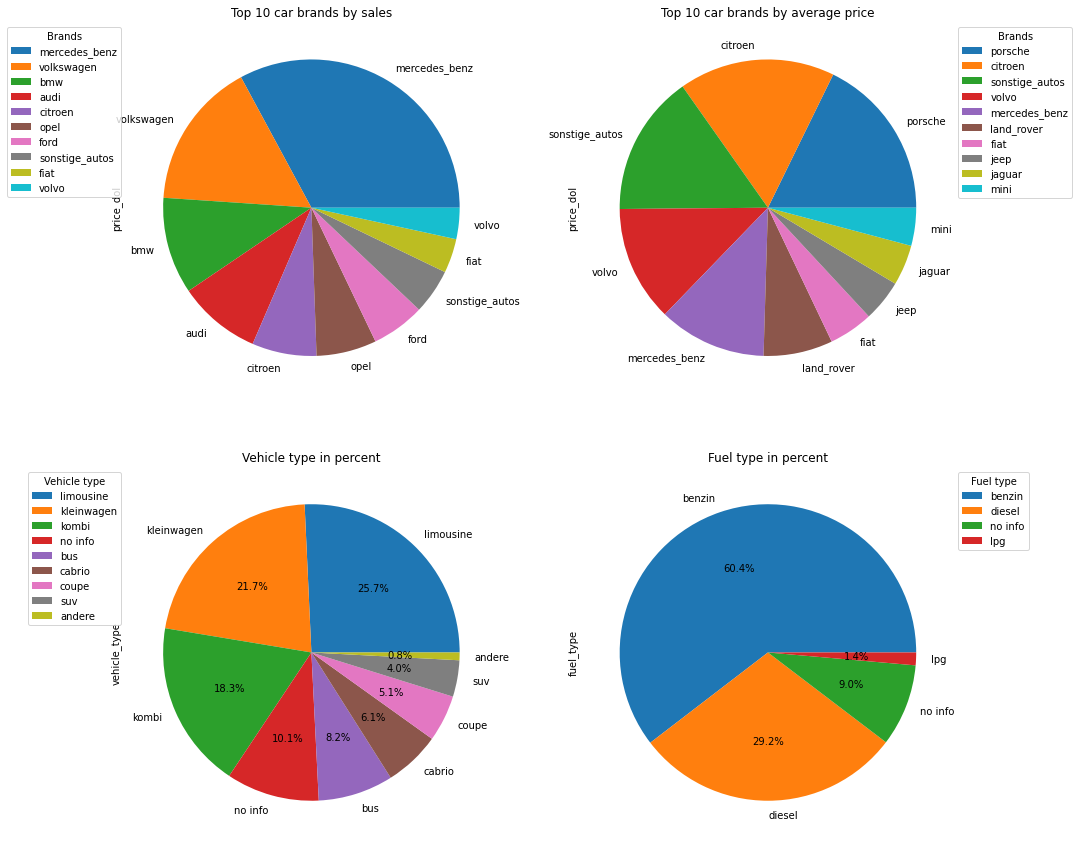

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 15))

(df.groupby('brand')
 .agg({'price_dol' : 'sum'})
 .sort_values(by='price_dol', ascending=False)
 .head(10)
 .plot.pie(title="Top 10 car brands by sales",y='price_dol', ax=axes[0,0])).legend(fontsize=10,bbox_to_anchor=(0, 1.0),title="Brands")

(df.groupby('brand')
 .agg({'price_dol' : np.mean})
 .sort_values(by='price_dol', ascending=False)
 .head(10)
 .plot.pie(title="Top 10 car brands by average price", y='price_dol', ax=axes[0,1])).legend(fontsize=10,bbox_to_anchor=(1.0, 1.0),title="Brands")


(df.groupby('vehicle_type')['vehicle_type'].count()
 .sort_values(ascending=False)
 .plot.pie(title="Vehicle type in percent",autopct='%1.1f%%', ax=axes[1,0]).legend(fontsize=10,bbox_to_anchor=(0, 1.0),title="Vehicle type"))

(df.groupby('fuel_type')['fuel_type'].count()
 .sort_values(ascending=False).head(4)
 .plot.pie(title="Fuel type in percent",autopct='%1.1f%%', ax=axes[1,1]).legend(fontsize=10,bbox_to_anchor=(1.0, 1.0),title="Fuel type"))

plt.show()

In [33]:
df.head(2)

,date_crawled,name,price_dol,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
0,2016-03-26,Peugeot 807 160 NAVTECH ON BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,no,2016-03-26,79588,2016-06-04
1,2016-04-04,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,no,2016-04-04,71034,2016-06-04
